In [124]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### 1. Dados

In [16]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df["Symptoms"] = 0
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
records = df.shape[0]
for i in range(records):
    values = df.iloc[i].values
    values = values.tolist()
    if 0 in values:
        df["Symptoms"][i] = values[1:values.index(0)]
    else:
        df["Symptoms"][i] = values[1:]

In [19]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches, na..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, n..."


In [20]:
column_values = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
column_values

array(['itching', ' skin_rash', ' nodal_skin_eruptions', ..., nan, nan,
       nan], dtype=object)

In [30]:
sintomas = pd.unique(column_values)
sintomas = sintomas.tolist()
sintomas = [i for i in sintomas if str(i) != "nan"]
sintomas

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' stomach_pain',
 ' acidity',
 ' ulcers_on_tongue',
 ' vomiting',
 ' cough',
 ' chest_pain',
 ' yellowish_skin',
 ' nausea',
 ' loss_of_appetite',
 ' abdominal_pain',
 ' yellowing_of_eyes',
 ' burning_micturition',
 ' spotting_ urination',
 ' passage_of_gases',
 ' internal_itching',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' high_fever',
 ' extra_marital_contacts',
 ' fatigue',
 ' weight_loss',
 ' restlessness',
 ' lethargy',
 ' irregular_sugar_level',
 ' blurred_and_distorted_vision',
 ' obesity',
 ' excessive_hunger',
 ' increased_appetite',
 ' polyuria',
 ' sunken_eyes',
 ' dehydration',
 ' diarrhoea',
 ' breathlessness',
 ' family_history',
 ' mucoid_sputum',
 ' headache',
 ' dizziness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' stiff_neck',
 ' depression',
 ' irritability',
 ' visual_disturbances',
 

In [34]:
df_sintomas = pd.DataFrame(columns = sintomas,index = df.index)
df_sintomas

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_sintomas["Symptoms"] = df["Symptoms"]
df_sintomas.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Symptoms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches, na..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, n..."


In [37]:
for i in sintomas:
    df_sintomas[i] = df_sintomas.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

In [38]:
df_sintomas.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Symptoms
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[itching, nodal_skin_eruptions, dischromic _..."
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, dischromic _patches, na..."
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[itching, skin_rash, nodal_skin_eruptions, n..."


In [40]:
df_sintomas["Disease"] = df["Disease"]
df_sintomas = df_sintomas.drop("Symptoms",axis=1)

In [41]:
df_sintomas

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


### 2. Divide em treino em teste

In [59]:
X = df_sintomas.iloc[:,:-1]
y = df_sintomas.iloc[:,-1]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3690, 131) (3690,)
(1230, 131) (1230,)


In [62]:
print(y)
print(le.inverse_transform([15,27]))

[15 15 15 ... 38 35 27]
['Fungal infection' 'Impetigo']


### 3. Classificadores

In [90]:
classificadores = {
    'KNN': KNeighborsClassifier(),
    'NB' : GaussianNB(),
    'DCT': tree.DecisionTreeClassifier(), 
}

In [92]:
def avalia(classificadores, kfold, X, y):
  sc = {
      'accuracy': 'accuracy',
      'precision': make_scorer(precision_score, average='micro'), 
      'recall': make_scorer(recall_score, average='micro')
  }
  for key, c in classificadores.items():
    print('Avaliando', key,':')

    model = c

    scores = cross_validate(model, X, y, cv=kfold, scoring=sc, return_train_score=True)

    print('acurácia:')
    print('treino:', scores['train_accuracy'].mean(),'teste:', scores['test_accuracy'].mean())

    print('precisão:')
    print('treino:', scores['train_precision'].mean(),'teste:', scores['test_precision'].mean())

    print('revocação:')
    print('treino:', scores['train_recall'].mean(),'teste:', scores['test_recall'].mean())

    print('\n##############################\n')

In [93]:
kfold=KFold(n_splits=10, shuffle=True, random_state=42)
avalia(classificadores, kfold, X, y)

Avaliando KNN :
acurácia:
treino: 1.0 teste: 1.0
precisão:
treino: 1.0 teste: 1.0
revocação:
treino: 1.0 teste: 1.0

##############################

Avaliando NB :
acurácia:
treino: 1.0 teste: 1.0
precisão:
treino: 1.0 teste: 1.0
revocação:
treino: 1.0 teste: 1.0

##############################

Avaliando DCT :
acurácia:
treino: 1.0 teste: 1.0
precisão:
treino: 1.0 teste: 1.0
revocação:
treino: 1.0 teste: 1.0

##############################



### 4. Matrizes de confusão

In [74]:
## retirado da internet 

def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

#### 4.1. KNN

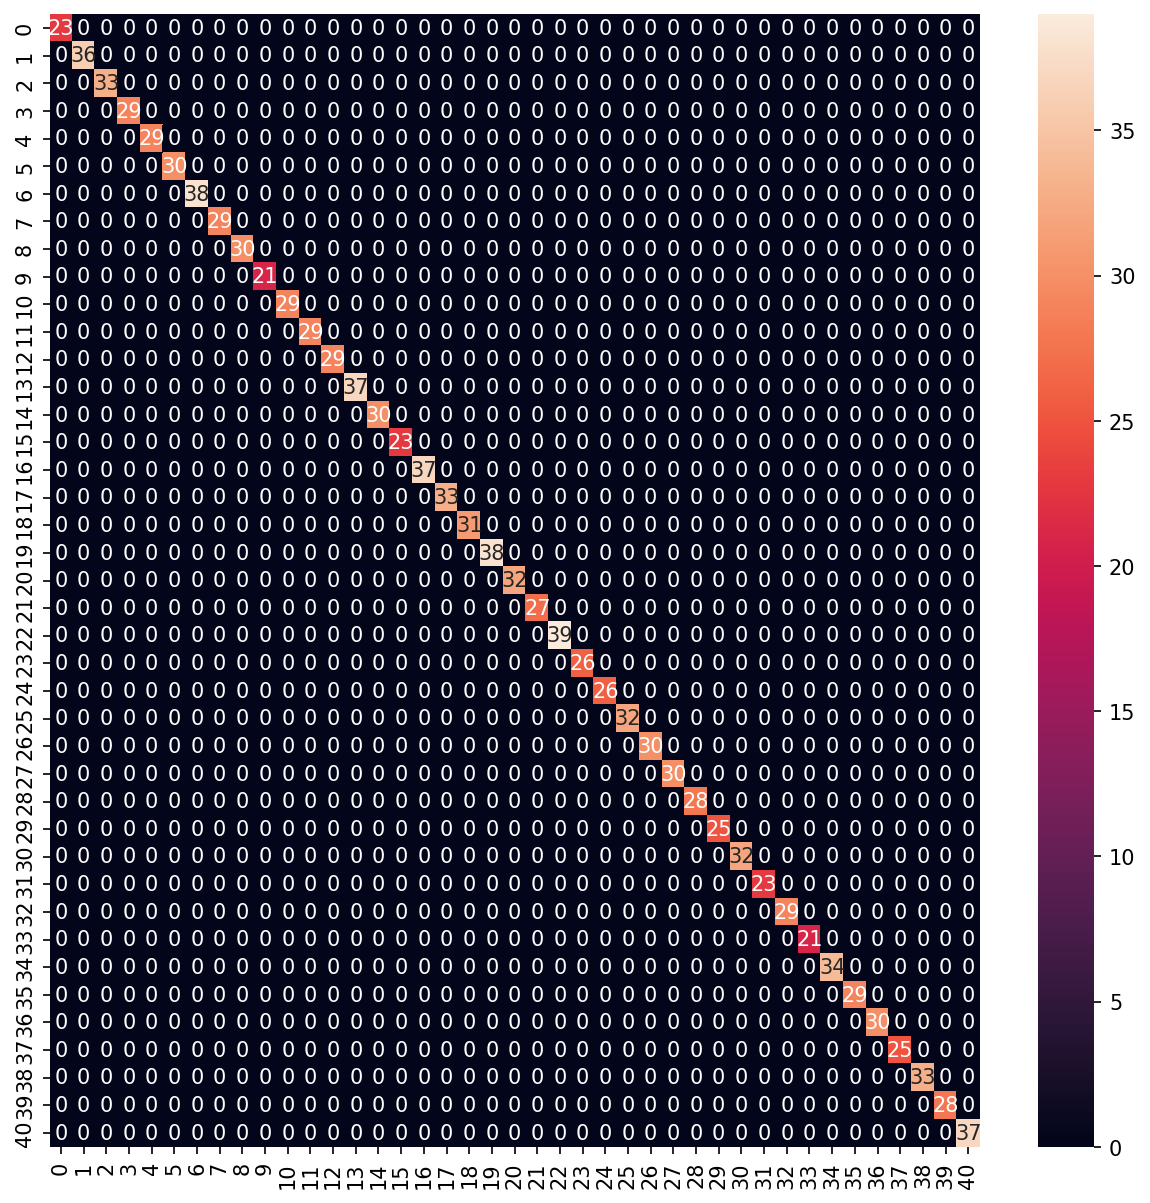

In [120]:
confusion_plot(KNeighborsClassifier().fit(X_train, y_train), X_test, y_test)

#### 4.2. Decision Tree

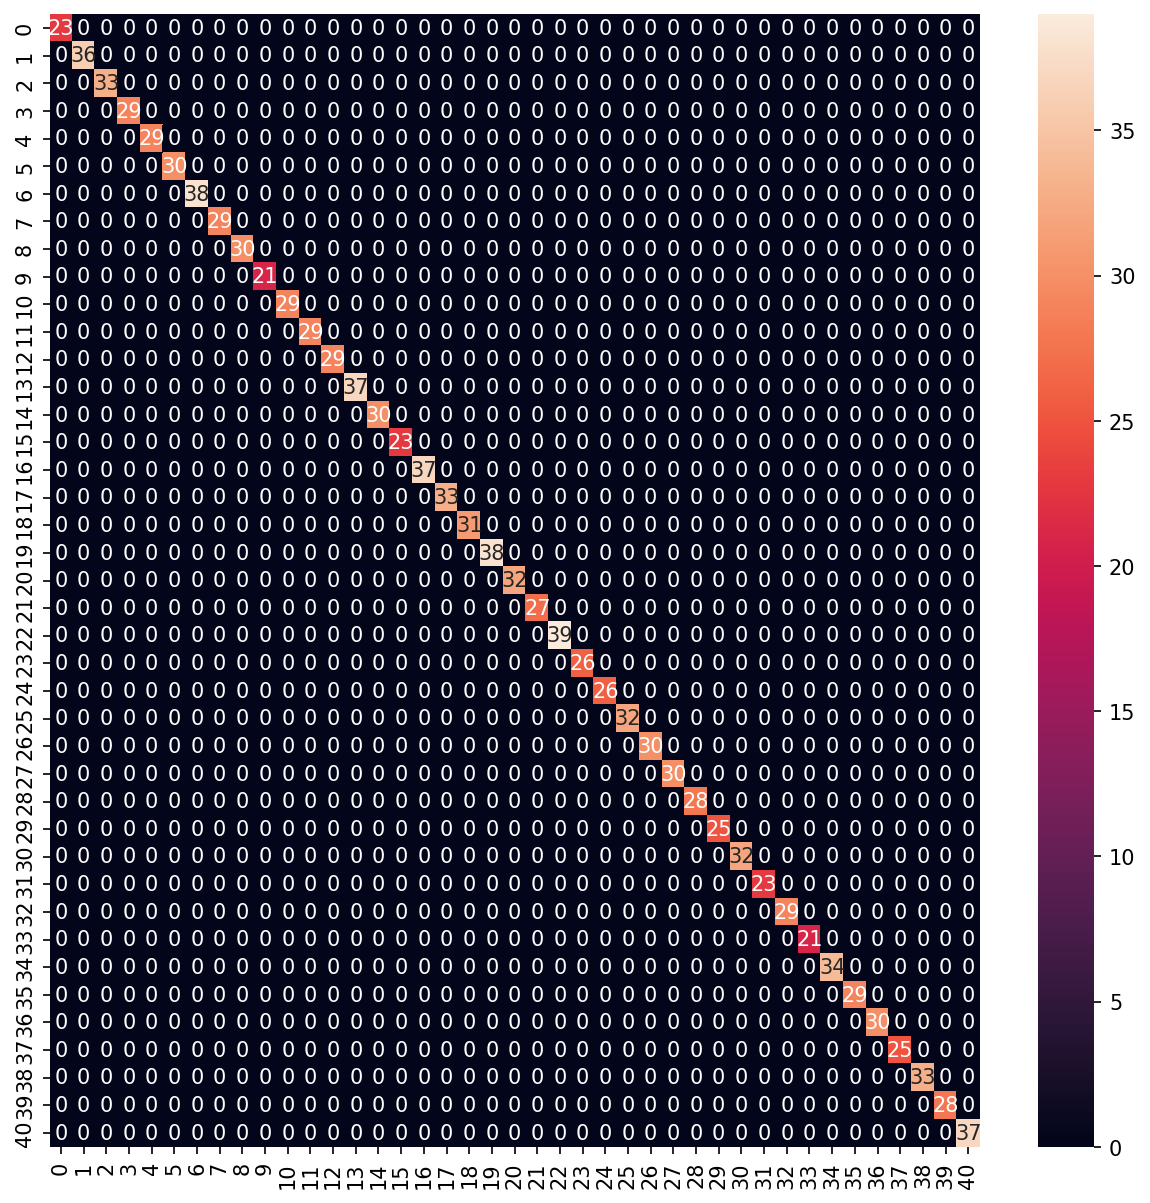

In [123]:
confusion_plot(tree.DecisionTreeClassifier().fit(X_train, y_train), X_test, y_test)

#### 4.3. Naive Bayes

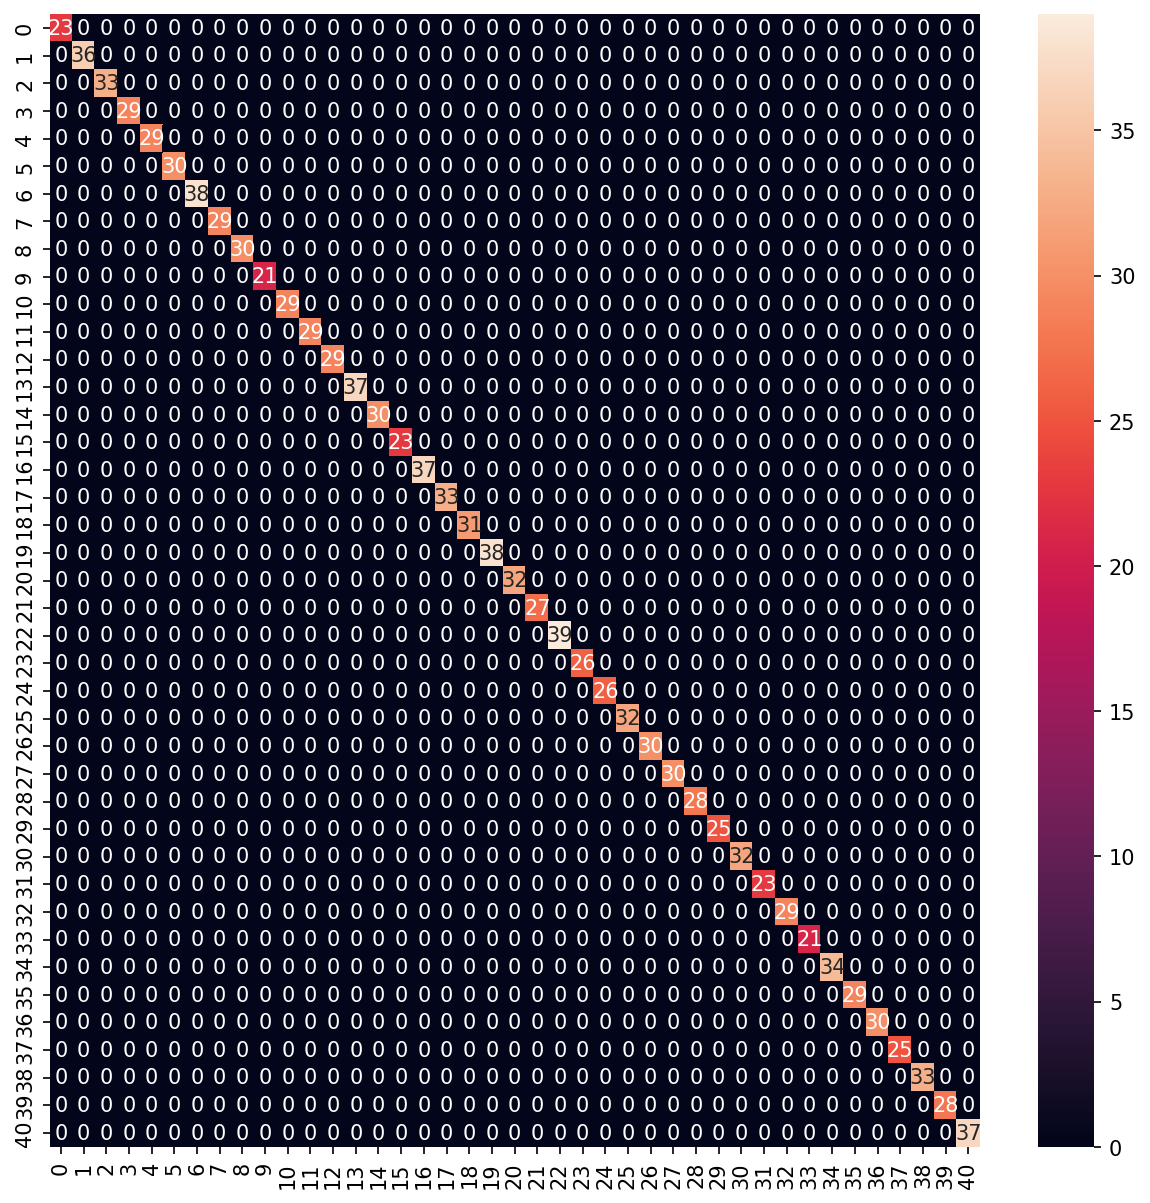

In [121]:
confusion_plot(GaussianNB().fit(X_train, y_train), X_test, y_test)

### 5. Plot Árvore de Decisão

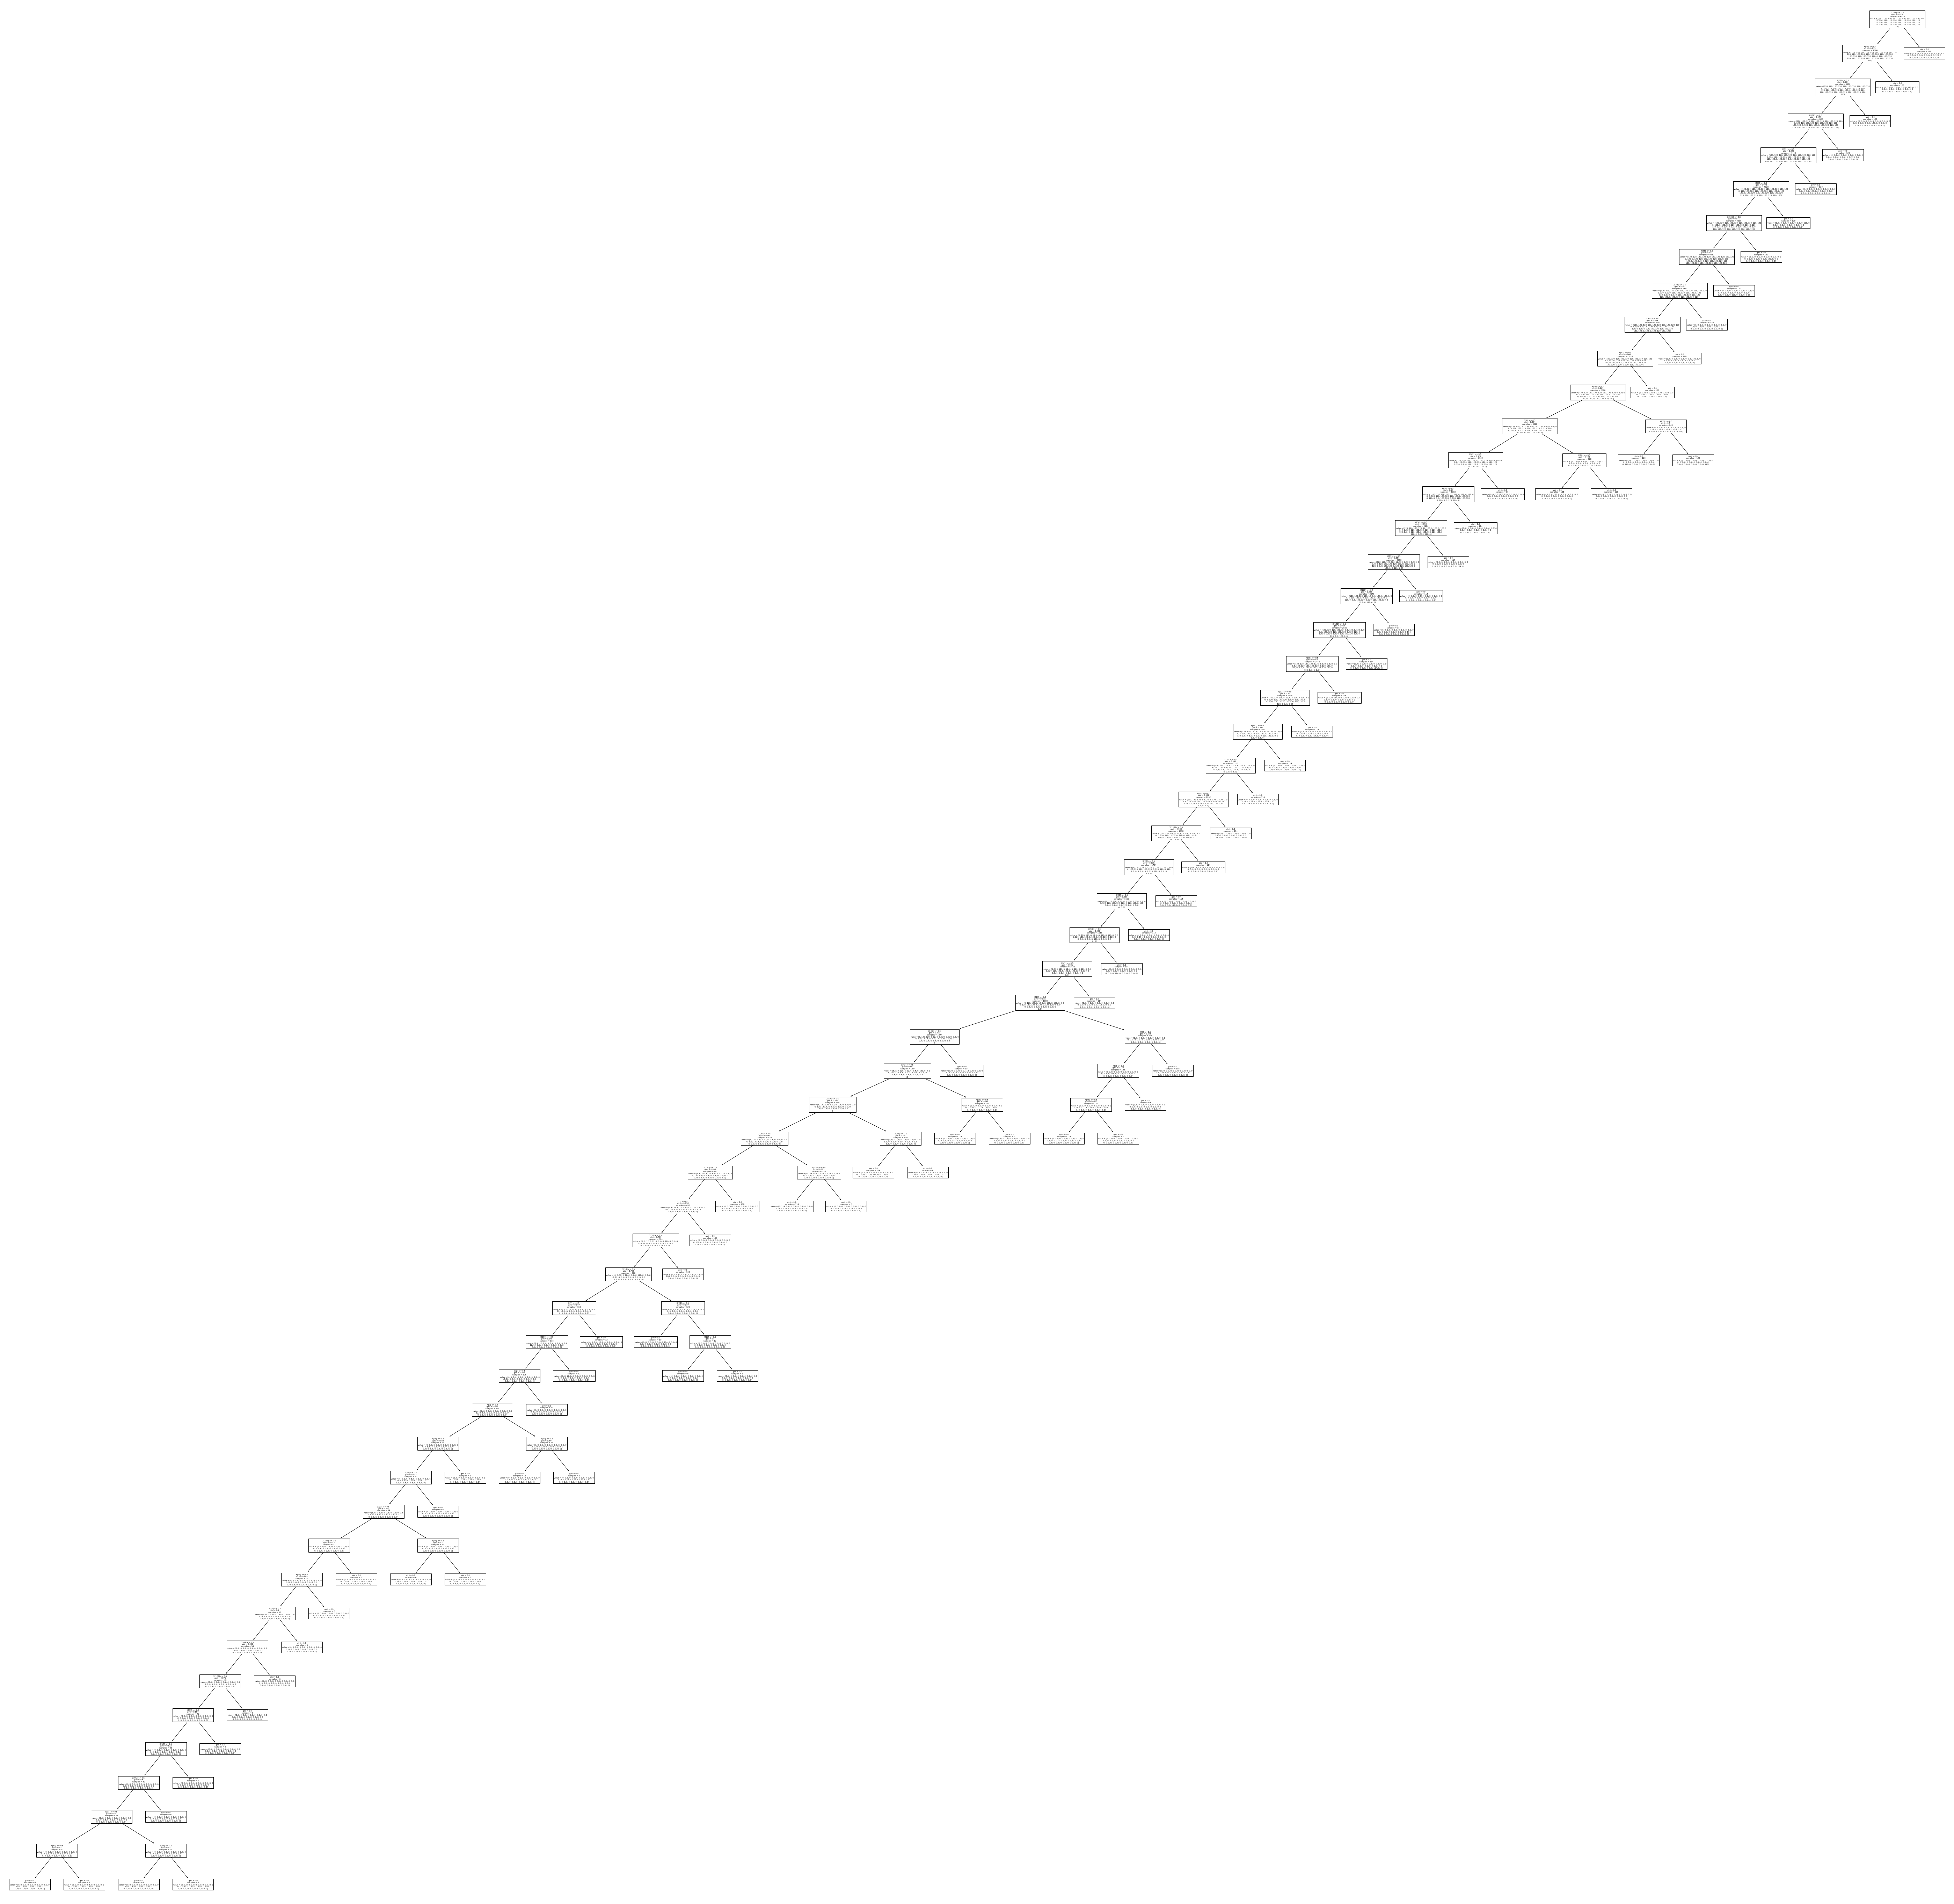

In [125]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

plt.figure(figsize=(100,100))
tree.plot_tree(clf);
